二項分布：ベルヌーイ試行において、成功率 $ p $ で試行数 $ N $ 回中に $ k $ 回成功する確率
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

## モジュールのインストール

```zsh
% pip install numpy
% pip install scipy
% pip install matplotlib
```

## 基本

### モジュールのインポート

In [27]:
import numpy as np
from scipy.stats import binom
import matplotlib as mpl
import matplotlib.pyplot as plt

# fivethirtyeightスタイルを使う
mpl.style.use(style='fivethirtyeight')

# Jupyter Notebookに描画する
%matplotlib inline

### 試行回数と成功確率をセット

- 期待値：$ E = Np $
- 標準偏差：$ \sigma = \sqrt{Np(1-p)} $

In [63]:
# 試行回数N
N = 80

# 成功率p
p = 0.5

# 成功回数k
k = np.arange(N+1) # 0~N

print(f'成功する確率(期待値)は、{N*p:.2f}')
print(f'二項分布の標準偏差は、{np.sqrt(N*p*(1-p)):.2f}')

成功する確率(期待値)は、40.00
二項分布の標準偏差は、4.47


### 二項分布をプロット

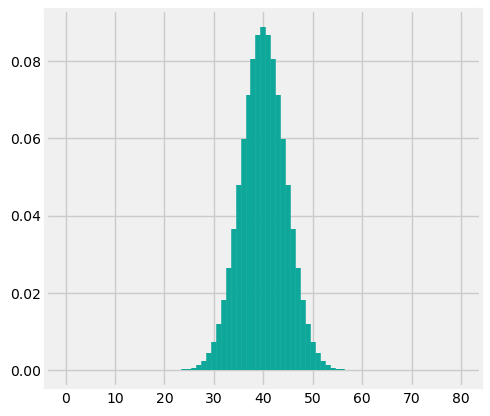

In [64]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.vlines(k, 0, binom.pmf(k, N, p), colors='#0EA89B')

## 応用

### 母平均μの95%信頼区間(0.025〜0.975)を確認する

In [65]:
# 両側5%
two_side_bottom, two_side_up = binom.interval(alpha=0.95, n=N, p=p)

print(f'試行回数{N:,}、成功率{p:.2%}においての母平均μの95%信頼区間は、{two_side_bottom:.2f}≦μ≦{two_side_up:.2f}')

試行回数80、成功率50.00%においての母平均μの95%信頼区間は、31.00≦μ≦49.00


### 成功率pの95%信頼区間(0.025〜0.975)を確認する

In [66]:
# 両側5%
two_side_bottom, two_side_up = binom.interval(alpha=0.95, n=N, p=p)

print(f'試行回数{N:,}においての成功率p({p:.2%})の95%信頼区間は、{two_side_bottom/N:.2%}≦μ≦{two_side_up/N:.2%}')
print(f'成功率pの幅：{(two_side_up-two_side_bottom)/N:.2%}')

試行回数80においての成功率p(50.00%)の95%信頼区間は、38.75%≦μ≦61.25%
成功率pの幅：22.50%


### 二項検定をする

#### 下側検定

In [67]:
# 下側5%
one_side_bottom = binom.ppf(q=0.05, n=N, p=p)

print(f'検定する値が{one_side_bottom}より小さいかどうかを見る。')

検定する値が33.0より小さいかどうかを見る。


#### 上側検定

In [68]:
# 上側5%
one_side_up = binom.ppf(q=0.95, n=N, p=p)
print(f'検定する値が{one_side_up}より大きいかどうかを見る。')

検定する値が47.0より大きいかどうかを見る。
